In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error

# preparing data

In [3]:
'upload file from pc'
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))

KeyboardInterrupt: ignored

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))
data=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data_X=data.iloc[:,:276]
data_Y=data.iloc[:,-1]

In [7]:
#choose 2019 data as Y test than shuffle datas
a=data_X.iloc[:,0]==2019
ind_list=[i for i, data_X in enumerate(a) if data_X]

# 2019 Y data choose as test samples other as train 
Y_train=[i for i in data_Y[ind_list]]
Y_test=[i for i in data_Y[:ind_list[0]-1]]
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,train_size=len(data_Y)-len(ind_list),test_size=len(ind_list), shuffle=False)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=0)
X_test,Y_test = shuffle(X_test,Y_test,random_state=0)

# neural network

In [8]:
from tensorflow import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [9]:
model = Sequential()
model.add(Dense(12, input_dim=276, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                3324      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 3,437
Trainable params: 3,437
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [11]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

102/102 [==============================] - 14s 8ms/step - loss: 1144.8530 - mse: 1144.8530 - mae: 24.0289 - val_loss: 21.5781 - val_mse: 21.5781 - val_mae: 3.3566
Epoch 2/150
102/102 [==============================] - 0s 2ms/step - loss: 17.2467 - mse: 17.2467 - mae: 2.8560 - val_loss: 4.7387 - val_mse: 4.7387 - val_mae: 1.7319
Epoch 3/150
102/102 [==============================] - 0s 2ms/step - loss: 4.2407 - mse: 4.2407 - mae: 1.5955 - val_loss: 4.4545 - val_mse: 4.4545 - val_mae: 1.6158
Epoch 4/150
102/102 [==============================] - 0s 2ms/step - loss: 4.2056 - mse: 4.2056 - mae: 1.5537 - val_loss: 4.3793 - val_mse: 4.3793 - val_mae: 1.5997
Epoch 5/150
102/102 [==============================] - 0s 2ms/step - loss: 4.0565 - mse: 4.0565 - mae: 1.5429 - val_loss: 4.4366 - val_mse: 4.4366 - val_mae: 1.6135
Epoch 6/150
102/102 [==============================] - 0s 2ms/step - loss: 3.9261 - mse: 3.9261 - mae: 1.5017 - val_loss: 4.3197 - val_mse: 4.3197 - val_mae: 1.5855
Epoch 7/15

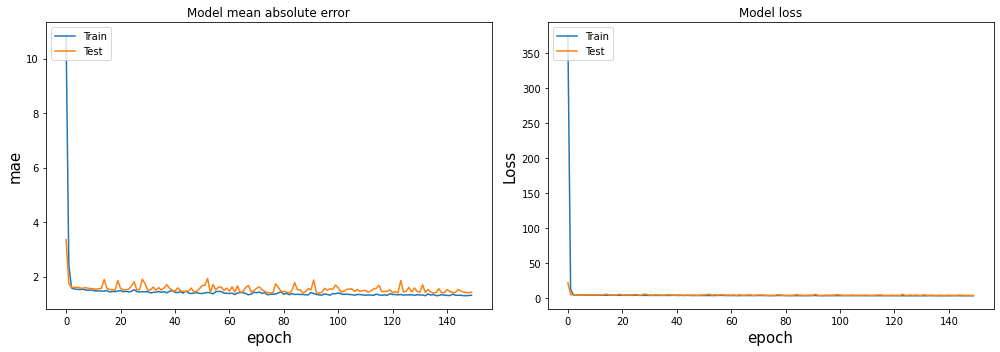

In [15]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model mean absolute error')
plt.ylabel('mae',size='15')
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch',size='15')
# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss')
plt.ylabel('Loss',size='15')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch',size='15')
plt.tight_layout()
plt.savefig('nn3layers.png',dpi=800)
plt.show()